
# Introduction



The field of finance has developed several methods for optimizing investment portfolios and understanding their risks. However, there is no easy-to-use web interface that makes use of this theory and is widely available to common investors. The purpose of this project is to develop easy-to-use tools based on decades of financial research.

Individual investors often have portfolios with a few stocks. This is not optimal, since these investors will incur in unnecessarily high risks to obtain small returns. By diversifying investments, an investor can easily decrease the amount of risk they are subject to, and achieve better and more consistent risk-reward trade-offs.

The goal of this project is to bring the benefits of financial theory to common investors. And, in the long-run, my vision for this project is to create a modern web-interface that allows individuals to take control of their investments in the stock market and understand the types of risks they are facing.

This notebook implements a portfolio optimization technique based on high-frequency data and modern financial econometrics theory. It the analyzes the benefits it can bring to investors that hold only few stocks in their portfolios.




# Analysis



In [1]:
import os
import pickle

from stock import Stock
from portfolio import Portfolio

# Load stored stocks
stocks = {}
for s in os.listdir(os.path.join(".", "data", "stock")):
    with open(os.path.join(".", "data", "stock", s), "rb") as f:
        stocks[s] = pickle.load(f)
print(stocks)

{'AAPL': Stock(AAPL), 'AXP': Stock(AXP), 'BA': Stock(BA), 'CAT': Stock(CAT), 'CSCO': Stock(CSCO), 'CVX': Stock(CVX), 'DOW': Stock(DOW), 'GS': Stock(GS), 'HD': Stock(HD), 'IBM': Stock(IBM), 'INTC': Stock(INTC), 'JNJ': Stock(JNJ), 'JPM': Stock(JPM), 'KO': Stock(KO), 'MCD': Stock(MCD), 'MMM': Stock(MMM), 'MRK': Stock(MRK), 'MSFT': Stock(MSFT), 'NKE': Stock(NKE), 'XOM': Stock(XOM)}
Portfolio(Stock(AAPL), Stock(AXP), Stock(BA), Stock(CAT), Stock(CSCO), Stock(CVX), Stock(DOW), Stock(GS), Stock(HD), Stock(IBM), Stock(INTC), Stock(JNJ), Stock(JPM), Stock(KO), Stock(MCD), Stock(MMM), Stock(MRK), Stock(MSFT), Stock(NKE), Stock(XOM))

Let's compare the risk of single stocks and a portfolio of all stocks.



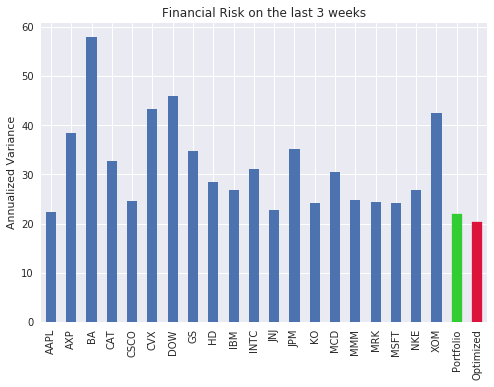

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Risk over the past 3 weeks
start, stop = stocks["AAPL"].intraday_ret.index[[0, -1]].date
risk = {s: Portfolio(stocks[s]).risk(start, stop) for s in stocks}
risk["Portfolio"] = Portfolio(*stocks.values()).risk(start, stop)
risk["Optimized"] = Portfolio(*stocks.values()).optimize().risk(start, stop)
# Combine risks into a data frame
risks = pd.DataFrame.from_dict(risk, orient="index", columns=["risk"])
# Anualize risk to make it more interpretable
risks = 100 * np.sqrt(252 * risks / 21)  # in percentage

# Visualize the differences
with plt.style.context("seaborn"):
    ax = risks.plot(
        kind="bar", title="Financial Risk on the last 3 weeks", legend=False,
    )
    ax.get_children()[len(risks) - 2].set_color("limegreen")
    ax.get_children()[len(risks) - 1].set_color("crimson")
    ax.set(ylabel="Annualized Variance")

The portfolio of many household investors usually consists of a few handpicked sotkcs, usually based on sentiment: what they think is a good company, what they hear in the news, or what companies they are most familiar with. The figure above compares the risk an investor incurs by holding an individual asset instead of a portfolio of many assets. The blue bars show that holding a portfolio of a single asset leads to a risk (variance) of about 30% per year. Considering that the long-term annual return of the US market index is of 8%, a risk of 30% per year is quite large.

Now, it is possible to diversify an investment by splitting the amount of money invested into multiple stocks. Consider a very simple strategy: given some different stocks, invest the same amount of money on each stock. The resulting portfolio has a risk that is represented by the green bar. This simple strategy yields a portfolio that has a risk lower than any of the other stocks. Indeed, its risk is about 22% per year as opposed to an average of 30% per year for the stocks. That is, diversifying our investment, even if it is done in a simple manner, gives us a lower risk.

We can further decrease the risk by using a better splitting strategy. The red bar in the figure above displays a portfolio constructed with such a strategy. It yields a risk of about 20% per year. To construct this portfolio, I use high-frequency returns from each stock to obtain measures of risk. From these measures of risk, we define how to split the investment between each stock. This strategy has an advantage that it does not require a measure of future expected returns, but only a measure of future risk, which can be readily obtained from high-frequency data and modern financial econometrics.

Let's compare the risk-reward tradeoffs of different portfolios:



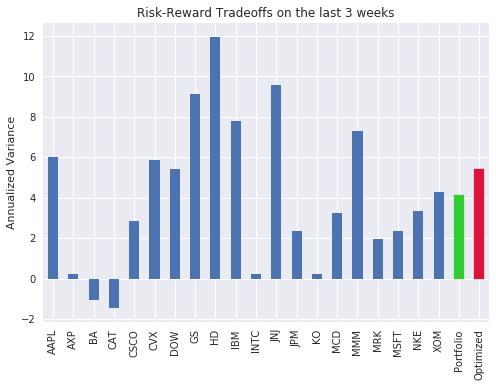

In [1]:
# Returns over the past 3 weeks
returns = {s: Portfolio(stocks[s]).return_between(start, stop) for s in stocks}
returns["Portfolio"] = Portfolio(*stocks.values()).return_between(start, stop)
returns["Optimized"] = (
    Portfolio(*stocks.values()).optimize().return_between(start, stop)
)
returns = pd.DataFrame.from_dict(returns, orient="index", columns=["return"])
# Anualize return to make it more interpretable
returns = 100*((1 + returns)**(252/21) - 1)
# Compute tradeoffs
tradeoffs = returns.divide(risks.values)

# Visualize the differences
with plt.style.context("seaborn"):
    ax = tradeoffs.plot(
        kind="bar", title="Risk-Reward Tradeoffs on the last 3 weeks", legend=False,
    )
    ax.get_children()[len(tradeoffs) - 2].set_color("limegreen")
    ax.get_children()[len(tradeoffs) - 1].set_color("crimson")
    ax.set(ylabel="Annualized Variance")

The figure above shows the risk-reward tradeoffs over the past 3 weeks for different stocks and two portfolios. Higher numbers represent better tradeoffs: for each unit of risk you received more returns. Notice that for the majority of stocks, the tradeoff is quite low, or even negative. That is, holding a single or a few stocks as your investment portfolio yields bad returns compared to the amount of risk you incurred.

Notice that there are a few stocks that performed very well over the past 3 weeks, and that is reflected as a high return reward per unit of risk incurred (tall blue bars). Even though having a portfolio of a single stock might look enticing, it is quite hard to pick the winners. Indeed, there are numerous hedge funds dedicated to doing so. However, the finance literature indicates (quite strongly) that hedge funds cannot pick winners consistently. One year a hedge fund does well, only to close the doors on the next year after their returns are terrible.

Now, consider the portfolios represented by the green and red bars. They offer a tradeoff far superior than the average stock, and, at a lower risk. Again, by extending and optimizing a portfolio with more stocks, we can achieve better results. Notice that by optimizing the portfolio with a better splitting strategy (red bar), we achieve an even better risk-reward tradeoff. Indeed, for each unit of risk, the optimized portfolio provides a return of 5.4% per year.

An additional benefit to an optimized portfolio is that its return and risk will be more consistent than single stocks. The consistency is achieved by combining ups and downs of different stocks, so that the portfolio does not suffer big crashes.




# Conclusion



Individual investors often have portfolios with a few stocks. This is not optimal, since these investors will incur in unnecessarily high risks to obtain small returns. By diversifying investments, an investor can easily decrease the amount of risk they are subject to, and achieve better and more consistent risk-reward trade-offs. This project implemented a portfolio optimization technique based on high-frequency data and modern financial econometrics theory. My goal is to make this available to everyone through a modern web-interface, that allows individuals to take control of their investments in the stock market and understand the types of risks they are facing.

Thanks for reading! :D

